In [1]:
cd /Users/dcox/Dropbox/Projects/CurrentProjectManuscripts/Empirical/PersonalFun/Matching/KaggleWebscrapingAnalysis/data

/Users/dcox/Dropbox/Projects/CurrentProjectManuscripts/Empirical/PersonalFun/Matching/KaggleWebscrapingAnalysis/data


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [5]:
# Read in data
at_bats = pd.read_csv('atbats.csv')
games = pd.read_csv('games.csv')
pitches = pd.read_csv('pitches.csv')
data = pd.read_csv('merged_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
df = data.copy()

In [ ]:
# Left join pitches and at_bats on ab_id column
data = pitches.merge(at_bats, on='ab_id', how='left')
data.to_csv('merged_data.csv')

In [12]:
data.dtypes

px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code                object
type                object
pitch_type          object
event_num            int64
b_score            float64
ab_id              float64
b_count            float64
s_count            float64
outs               float64
pitch_num          float64
o

In [13]:
# Create one df for objects and one df for ints
data_obj = ['code', 'type', 'pitch_type', 'event', 'p_throws', 'stand', 'top']
data_objs = data[data_obj]
data_ints = data.drop(data[data_obj], axis=1)
data_ints_cols = list(data_ints)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f5da490>,
      dtype=object)

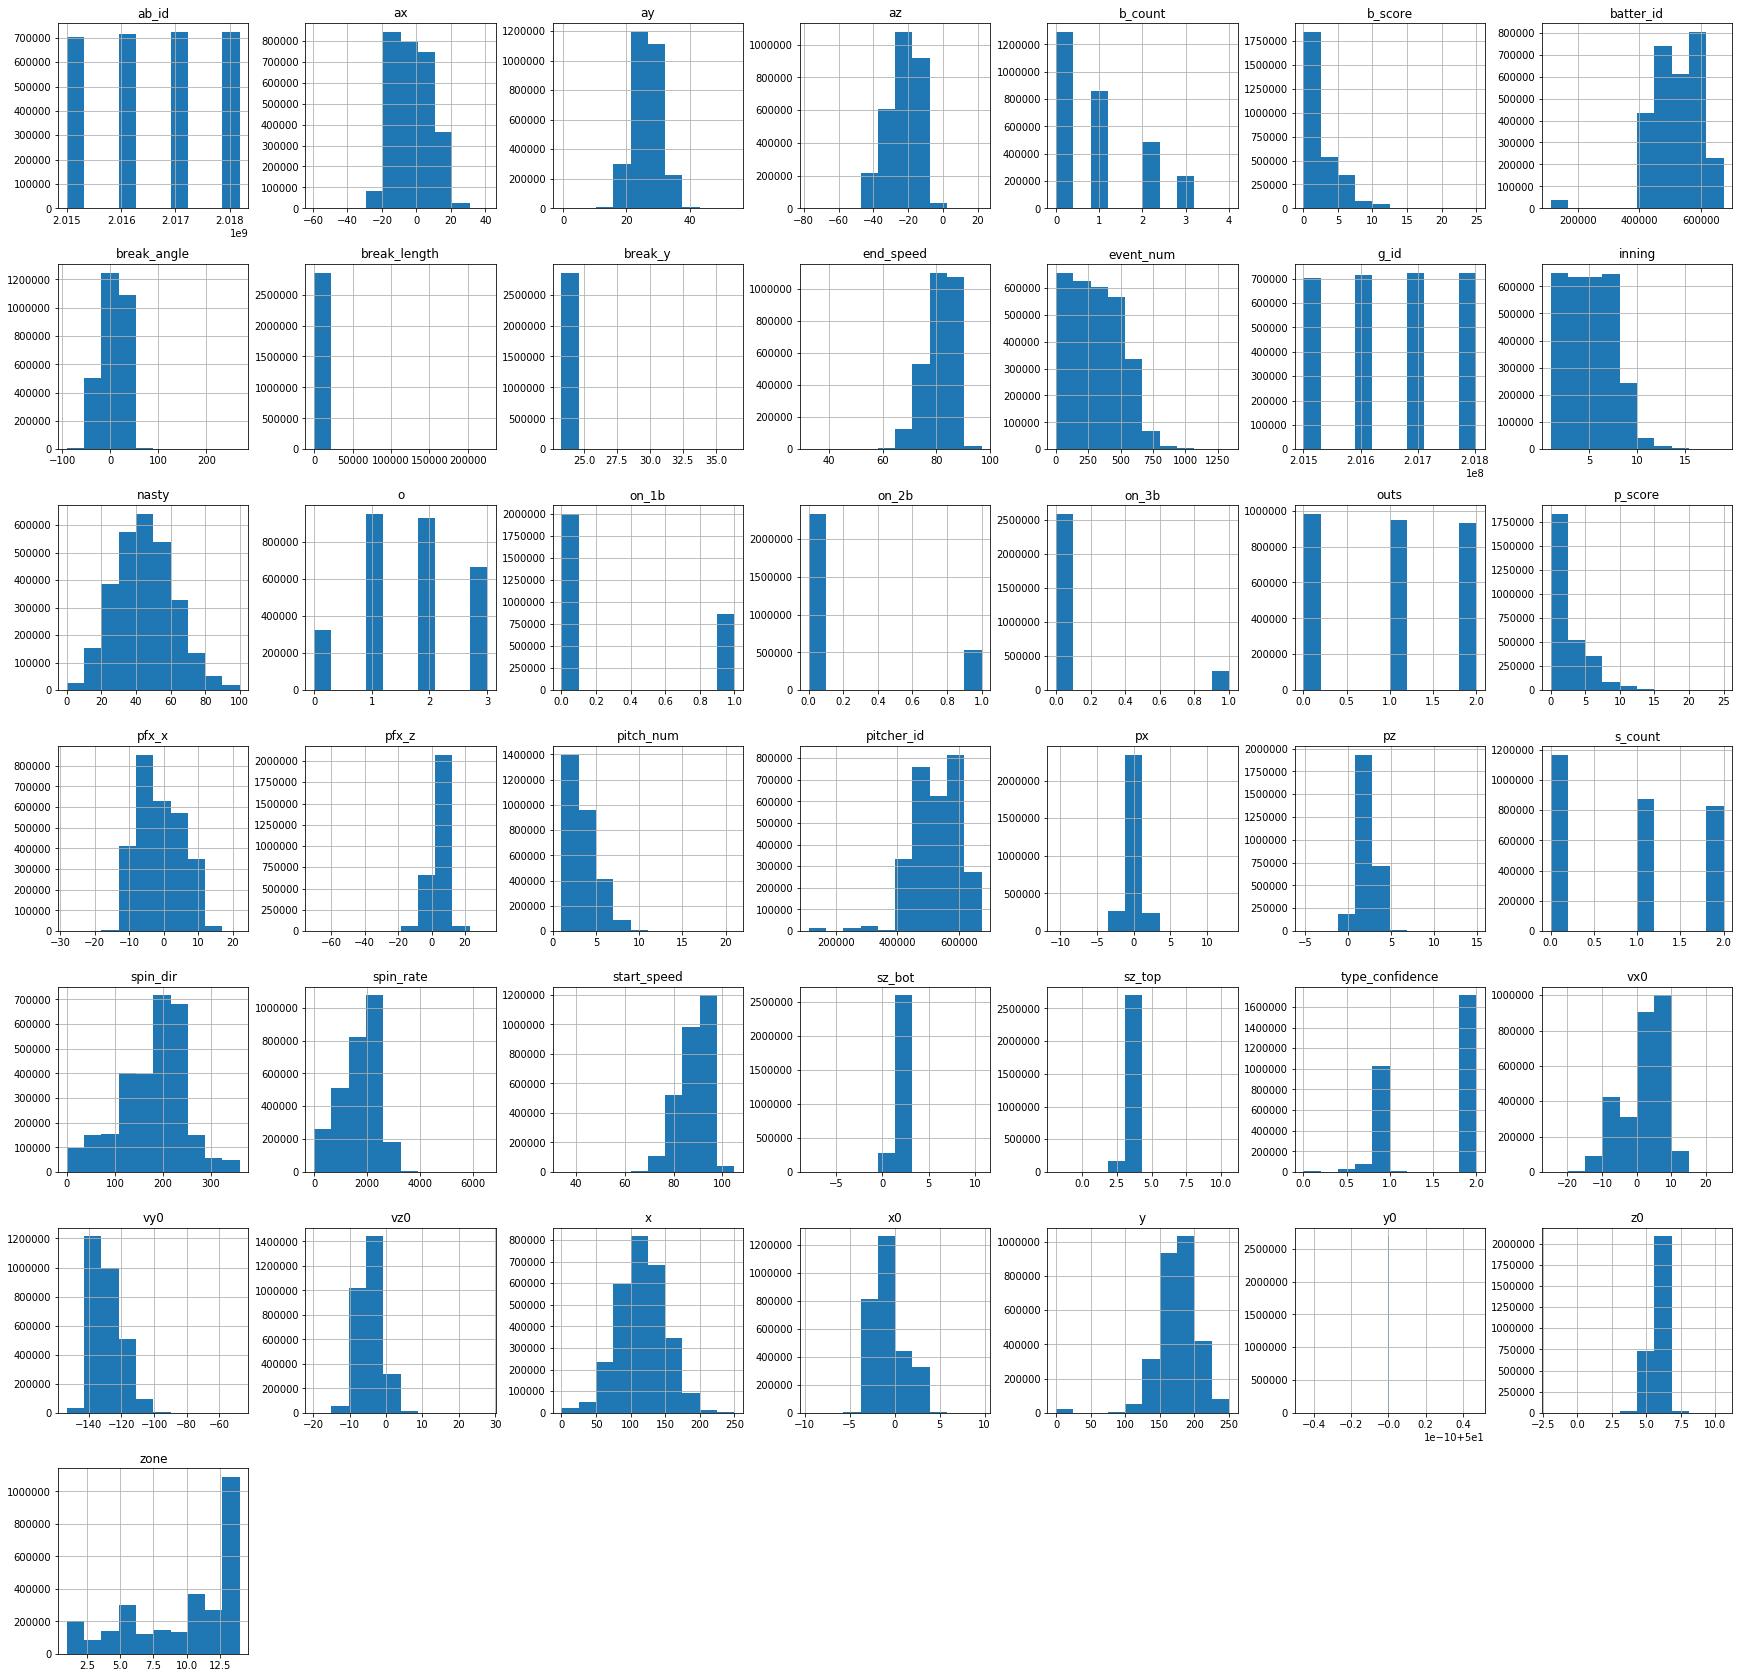

In [14]:
# Histograms of 
data_ints.hist(figsize=(30, 30))